<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Dummies_%26_One_Hot_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [8]:
url = 'https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-4/Conversion_techniques/homeprices.csv'
df = pd.read_csv(url)
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [4]:
X = df[['town', 'area']]
y = df['price']


In [5]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), ['town'])],
    remainder='passthrough'
)

X_transformed = ct.fit_transform(X)

In [6]:
model = LinearRegression()
model.fit(X_transformed, y)

# Check model performance
print("Model R^2 score:", model.score(X_transformed, y))

# Predict price for a house in 'robinsville' with area = 3400
# We need to encode input manually in the same format as the training data:
# OneHotEncoder(drop='first') with 3 towns ('monroe township', 'robinsville', 'west windsor') gives:
# ['robinsville', 'west windsor'] as one-hot columns, dropping 'monroe township' (base)

# So: [robinsville=1, west windsor=0, area=3400]
input_data = [[1, 0, 3400]]
predicted_price = model.predict(input_data)
print(f"Predicted price for a 3400 sq.ft house in Robinsville: ${predicted_price[0]:,.2f}")

Model R^2 score: 0.9573929037221873
Predicted price for a 3400 sq.ft house in Robinsville: $666,914.10


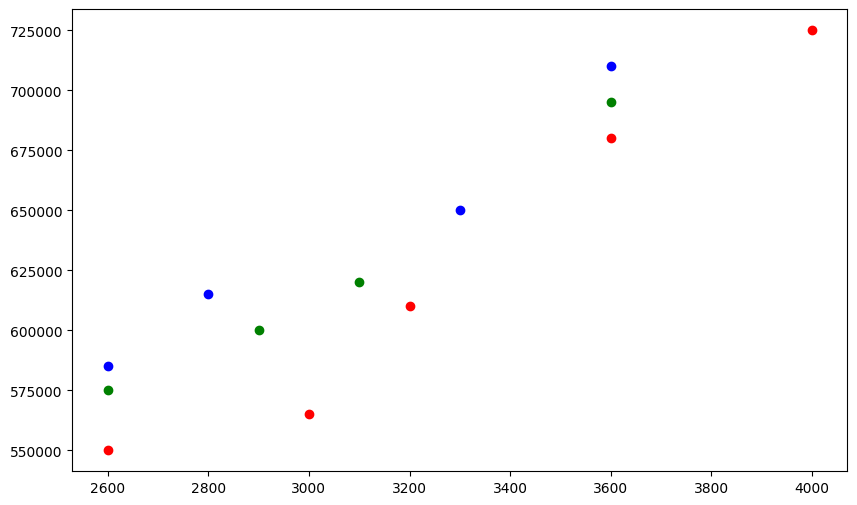

In [9]:
plt.figure(figsize=(10, 6))
colors = {'monroe township': 'red', 'robinsville': 'green', 'west windsor': 'blue'}
for town in df['town'].unique():
    subset = df[df['town'] == town]
    plt.scatter(subset['area'], subset['price'], color=colors[town], label=town)

# Plot regression lines
areas = np.linspace(1500, 4000, 100)

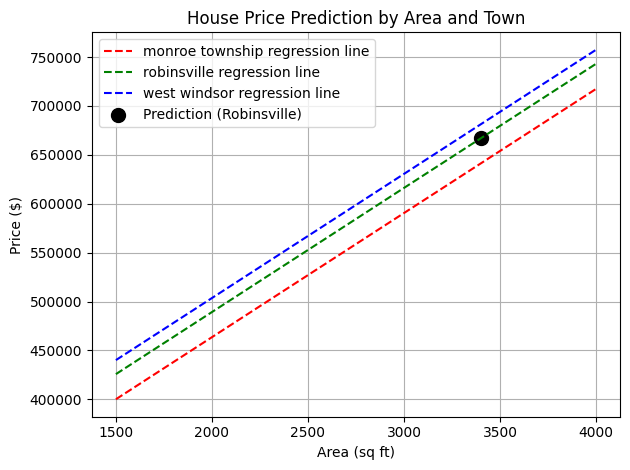

In [13]:
intercept = model.intercept_
coeffs = model.coef_  # [robinsville, west windsor, area]

# Plot line for each town
for town, color in colors.items():
    if town == 'monroe township':
        onehot = [0, 0]  # base town, dropped in encoding
    elif town == 'robinsville':
        onehot = [1, 0]
    elif town == 'west windsor':
        onehot = [0, 1]

    prices = intercept + coeffs[0]*onehot[0] + coeffs[1]*onehot[1] + coeffs[2]*areas
    plt.plot(areas, prices, color=color, linestyle='--', label=f"{town} regression line")

# Highlight prediction
plt.scatter(3400, predicted_price, color='black', s=100, label='Prediction (Robinsville)')
plt.title("House Price Prediction by Area and Town")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()